# Visualización y Creación de variables
Se generan variables con el objetivo de proporcionar información adicional.     

In [79]:
# Importando las librerías
import os
import numpy as np # type: ignore # type: ignore
import matplotlib.pyplot as plt # type: ignore
import pandas as pd  # type: ignore


# Cargar datos desde un archivo CSV
try:
    rutaAbsoluta = os.path.abspath('Accidentes_Aereos_Filtrados.csv')
    df = pd.read_csv(rutaAbsoluta)    
except FileNotFoundError:
    print("El archivo no se encuentra.")

Se presenta una visualización de los datos para generar ideas para crear variables que puedan ayudar a entregar una mayor o mejor información sobre el estudio. 

In [80]:
# Mostrar las primeras (3) filas:
print("\u001b[1mVISUALIZACIÓN DE LAS PRIMERAS (3) FILAS\u001b[0m")
df.head(3) # type: ignore

VISUALIZACIÓN DE LAS PRIMERAS (3) FILAS


,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,21,12/16/1918,NaN,"Elizabeth, New Jersey",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,97,NaN,1.0,1.0,0.0,NaN
1,22,05/25/1919,NaN,"Cleveland, Ohio",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,61,NaN,1.0,1.0,0.0,Caught fire in midair. The pilot leaped from t...
2,23,07/19/1919,NaN,"Dix Run, Pennsylvania",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,82,NaN,1.0,1.0,0.0,NaN


In [69]:
# Información general de la tabla:
print("\u001b[1mINFOMACIÓN GENERAL\u001b[0m")
df.info()  # type: ignore

INFOMACIÓN GENERAL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4892 entries, 0 to 4891
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         4892 non-null   int64         
 1   Date          4892 non-null   datetime64[ns]
 2   Time          2945 non-null   object        
 3   Location      4878 non-null   object        
 4   Operator      4892 non-null   object        
 5   Flight #      1059 non-null   object        
 6   Route         3424 non-null   object        
 7   Type          4892 non-null   object        
 8   Registration  4892 non-null   object        
 9   cn/In         4010 non-null   object        
 10  Aboard        4892 non-null   float64       
 11  Fatalities    4892 non-null   float64       
 12  Ground        4892 non-null   float64       
 13  Summary       4575 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(9)
memory usage: 5

#### Gráfico de accidentes por operadores
Se genera una varible mediante el el agrupamiento de los operdores y contandolos.  
`Variable nueva: operator_counts`  
Solamente se visualizan 20 operadores desde el de mayor número de accidentes y así sucesivamente, se presentan solamente 20 debido a ala gran cantidad de operadores ocasionando un grafico difícil de leer.  
El gráfico de barras horizontal presentado muestra la distribución del número de accidentes por diferentes operadores aéreos. Cada barra representa un operador y su longitud indica la cantidad de accidentes asociados a ese operador. Los operadores están ordenados de menor a mayor número de accidentes, con el operador con más accidentes en la parte inferior del gráfico.

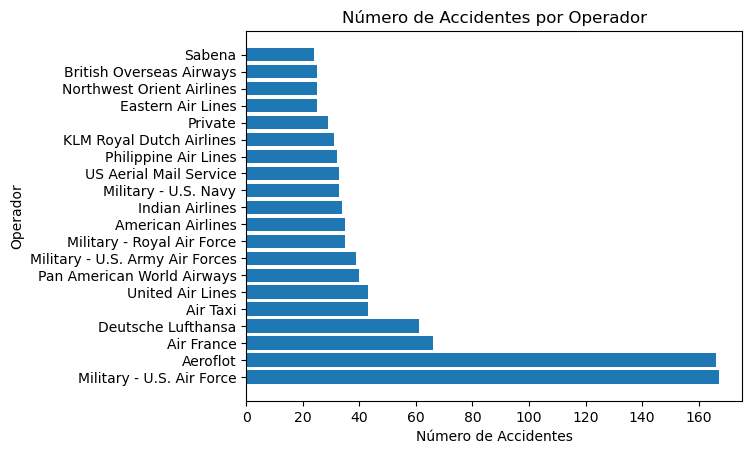

In [91]:
# Agrupar por operador y contar el número de accidentes
operator_counts = df.groupby("Operator").size()
operator_counts = operator_counts.sort_values(ascending=False)
# Crear el gráfico
plt.barh(operator_counts.index[:20], operator_counts[:20])
plt.xlabel("Número de Accidentes")
plt.ylabel("Operador")
plt.title("Número de Accidentes por Operador")
plt.show()

#### Gráfico de muertes causadas por operadores
Se crea la variable `operator_fatalities`, agrupando las victimas según el operador y posteriormente sumándolas.
Para la visualización del gráfico:
-	Eje X: Nombre del operador.
-	Eje Y: Cantidad de victimas por operador.  

Solamente se visualizan 20 operadores desde el de mayor víctimas y así sucesivamente, se presentan solamente 20 debido a ala gran cantidad de operadores ocasionando un grafico difícil de leer.  
El gráfico de barras horizontal presentado muestra la cantidad de víctimas fatales causadas por diferentes operadores. 


Text(0.5, 1.0, 'MUERTES CAUSADAS POR OPERADORES')

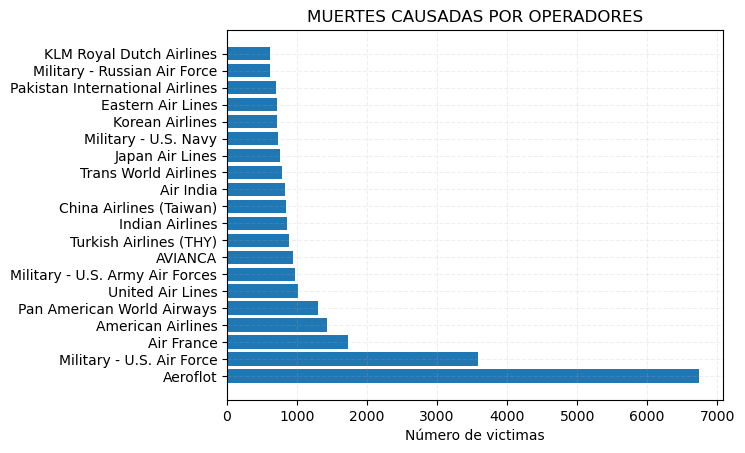

In [83]:
operator_fatalities = pd.DataFrame(df.groupby(['Operator']).sum()['Fatalities'])

# Ordenar los datos de forma descedente
operator_fatalities = operator_fatalities.sort_values("Fatalities", ascending=False)

# Gráfico: MUERTES CAUSADAS POR OPERADORES
operator_fatalities_x = operator_fatalities.index # Eje X
operator_fatalities_y = operator_fatalities['Fatalities'] # Eje y

plt.barh(operator_fatalities_x[:20],operator_fatalities_y[:20])

# Personalizar el gráfico
plt.grid(True, linestyle='--', alpha=0.2)
plt.xlabel('Número de victimas') # Nombre del eje X
plt.title('MUERTES CAUSADAS POR OPERADORES') # Titulo

#### Gráfico, víctimas y pasajeros por año
Se realiza un gráfico de lineas para visualizar con mejor claridad los datos, además se comparan dos gráficos la cual corresponde a las victimas y al número de pasajeros.  
`Variable nueva: fatalities_year`  
`Variable nueva: aboard_year`  
El gráfico de líneas que nos presentas muestra la evolución en el tiempo del número de víctimas y pasajeros. En el eje horizontal se representa el año, desde 1920 hasta el año 2000 aproximadamente, y en el eje vertical se muestra la cantidad de personas, tanto víctimas como pasajeros.  

El gráfico presenta dos líneas:
- Línea Azul: Representa el número total de víctimas en accidentes aéreos cada año.
- Línea Naranja: Representa el número total de pasajeros transportados por vía aérea cada año.

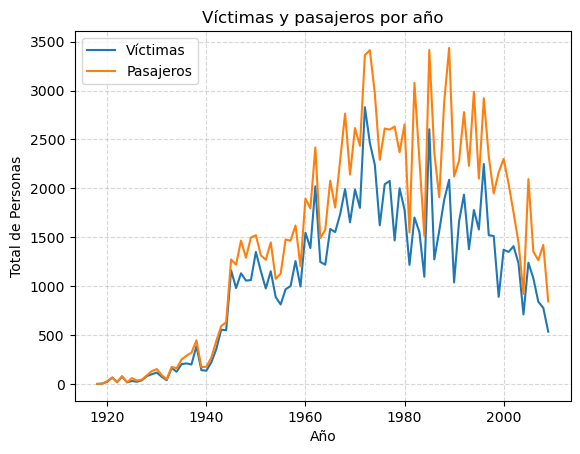

In [77]:
#transformando a data en dia/mes/ano para filtramos individualmente el año
df.Date = pd.to_datetime(df.Date) 
#df.head() 
df['Date'] = pd.to_datetime(df['Date'])

# Creación de variables para la gráfica
fatalities_year = df.groupby(df['Date'].dt.year)['Fatalities'].sum()
aboard_year = df.groupby(df['Date'].dt.year)['Aboard'].sum()

# Creando subplot, para comparar dos gráficos de lineas 
fig, ax = plt.subplots()

# Plot fatalities 
ax.plot(fatalities_year.index, fatalities_year.values, label='Víctimas')

# Plot pasajeros
ax.plot(aboard_year.index, aboard_year.values, label='Pasajeros')

# Personalizar el gráfico
ax.set_xlabel('Año')
ax.set_ylabel('Total de Personas')
ax.set_title('Víctimas y pasajeros por año')
ax.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Conclusiones
- Algunos operadores, como Aeroflot y Military - U.S. Air Force, han experimentado un número significativamente mayor de accidentes en comparación con otros.
- Alta variabilidad en el número de víctimas: Existe una gran disparidad en el número de víctimas entre los diferentes operadores aéreos. Algunas aerolíneas tienen un número relativamente bajo de víctimas, mientras que otras han registrado miles de fatalidades.
- Aeroflot y el Military - U.S. Air Force destacan por tener el mayor número de víctimas reportadas en el gráfico.
-La disminución general en el número de víctimas a pesar del aumento en el número de pasajeros es una clara señal de que la seguridad aérea ha mejorado significativamente a lo largo del tiempo.
- Los picos en la línea de víctimas indican que incluso con mejoras en la seguridad, los accidentes aéreos pueden causar un gran número de víctimas.


## Aplicación Práctica del Dataset
A partir de los datos analizados sobre accidentes aéreos y el número de pasajeros, podemos proponer diversas aplicaciones prácticas que pueden beneficiar a la industria de la aviación, a los reguladores y a los pasajeros:
- Sistemas de Alerta Temprana:  Indetificación de patrones, prevención de accidentes.

- Optimización de Rutas y Procedimientos: Identificar las zonas geográficas con mayor incidencia de accidentes para ajustar las rutas de vuelo y los procedimientos operativos.

- Evaluación de la Seguridad de las Aerolíneas, Crear indicadores de seguridad basados en el número de accidentes, el número de víctimas y otros factores relevantes.

- Investigación y Desarrollo, Los datos pueden identificar áreas donde se necesitan más investigación y desarrollo, como nuevos materiales para aviones, sistemas de prevención de colisiones o tecnologías de detección de fatiga de los pilotos.  

Las posibilidades de aplicación de estos datos son vastas y pueden contribuir a mejorar significativamente la seguridad aérea. 
